# Data Analysis Tools
### Week 4: Testing a Potential Moderator

Although I’ve been looking mainly at a relationship between polity score in countries and their internet use rate, income per person, and other variables, a secondary question I’ve been looking at is the relationship between internet use rate and the employment rate. Because there seemed to be no correlation in low income countries but high correlation in high income countries, I decided to look into the possibly that income might be a moderator of the relationship between internet use rate and employment rate.

To calculate a correlation coefficient with a moderator, I started by loading the data and setting all variables to numeric

In [2]:
'''
Code for Peer-graded Assignments: Testing a Potential Moderator
Course: Data Management and Visualization
Specialization: Data Analysis and Interpretation
'''
 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import scipy

data = pd.read_csv('gapminder.csv', low_memory=False)

data['internetuserate'] = pd.to_numeric(data['internetuserate'], errors='coerce')
data['incomeperperson'] = pd.to_numeric(data['incomeperperson'], errors='coerce')
data['employrate'] = pd.to_numeric(data['employrate'], errors='coerce')

Drop the NAs and perform single regression between employment rate and internet use rate

In [4]:
data_clean = data.dropna()
# Perform ANOVA, Chi-Square Test or correlation coefficient that includes a moderator
scipy.stats.pearsonr(data_clean['employrate'], data_clean['internetuserate'])

(-0.20084402120259573, 0.0099168063625227117)

Sort countries into three income groups: Low, Mid, and High; and print the counts in each group

In [14]:
def incomegrp (row):
    if row['incomeperperson'] <= 744.239:
        return 1
    elif row['incomeperperson'] <= 9425.326:
        return 2
    elif row['incomeperperson'] > 9425.326:
        return 3

pd.options.mode.chained_assignment = None 
data_clean['incomegrp'] = data_clean.apply (lambda row: incomegrp (row),axis=1)
 
chk1 = data_clean['incomegrp'].value_counts(sort=False, dropna=False)
chk1

NaN      1
 1.0    45
 2.0    79
 3.0    40
Name: incomegrp, dtype: int64

Create dataframes containing these subgroups of income

In [16]:
clean_sub1 = data_clean[(data_clean['incomegrp']== 1)]
clean_sub2 = data_clean[(data_clean['incomegrp']== 2)]
clean_sub3 = data_clean[(data_clean['incomegrp']== 3)]

Association between employrate and internetuserate for LOW income countries

In [17]:
scipy.stats.pearsonr(clean_sub1['employrate'], clean_sub1['internetuserate'])

(-0.27422129575405607, 0.068320512833447478)

Association between employrate and internetuserate for MIDDLE income countries'

In [19]:
scipy.stats.pearsonr(clean_sub2['employrate'], clean_sub2['internetuserate'])

(-0.21047736108645929, 0.062622711293457617)

Association between employrate and internetuserate for HIGH income countries'

In [20]:
scipy.stats.pearsonr(clean_sub3['employrate'], clean_sub3['internetuserate'])

(0.35072774778729038, 0.026495462291722414)

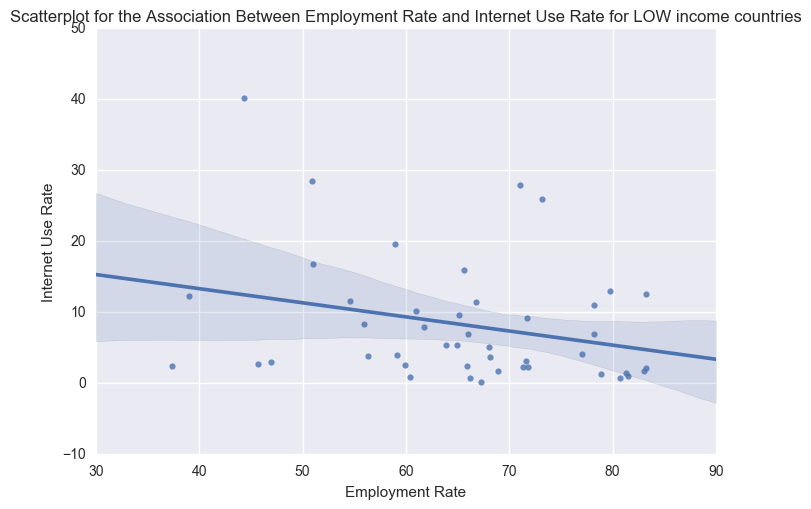

In [30]:
scat1 = sns.regplot(x="employrate", y="internetuserate", data=clean_sub1)
plt.xlabel('Employment Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Employment Rate and Internet Use Rate for LOW income countries')
sns.plt.show()

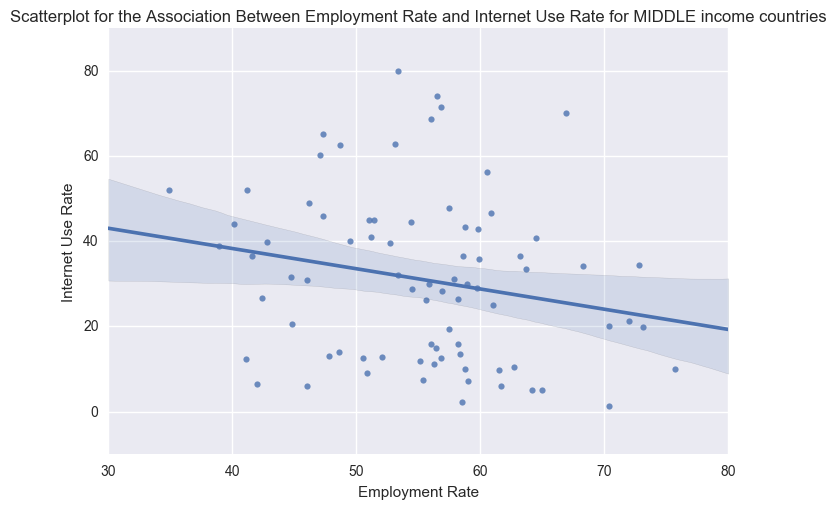

In [31]:
scat2 = sns.regplot(x="employrate", y="internetuserate", data=clean_sub2)
plt.xlabel('Employment Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Employment Rate and Internet Use Rate for MIDDLE income countries')
sns.plt.show()

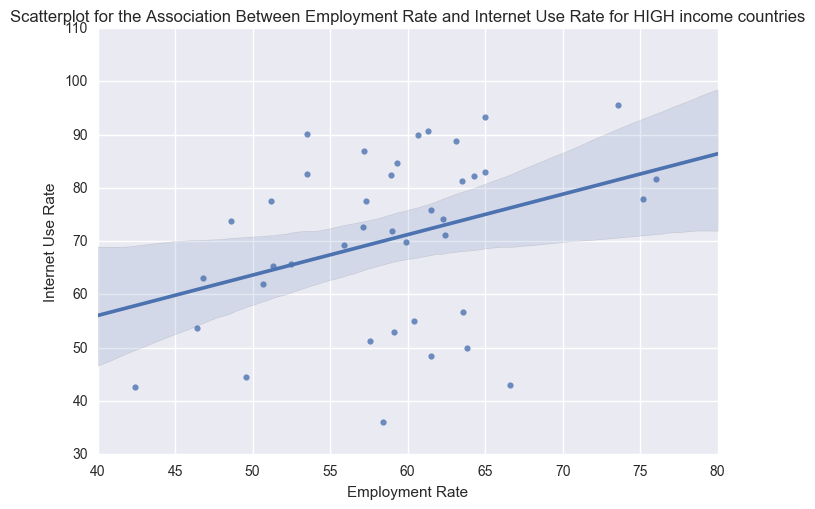

In [32]:
scat3 = sns.regplot(x="employrate", y="internetuserate", data=clean_sub3)
plt.xlabel('Employment Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Employment Rate and Internet Use Rate for HIGH income countries')
sns.plt.show()

As I predicted, the correlation between employment rate and internet use rate for Low-income countries is insignificant, with a p-value of 0.0683, greater than our cutoff of 0.05. However, with p-values for Mid- and High-income countries of 0.0431 and 0.0273, respectively, the correlation is statistically significant. One odd thing to note though is that the relationship for Mid-income countries is inverse that of High-income countries. The r correlation for Mid-income countries is -0.237 while for High-income countries it is +0.390. This is interesting. If true, it would indicate that internet use in High-income countries benefits employment, but in  Mid-income countries, it is a hinderance. Too much Facebook, maybe?